Correlation Analysis: Study relationships between peer pressure, academic competition, and mental well-being.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("academicStresslevel.csv")

# print(df.columns.tolist())

df = df.rename(columns={
    "Peer pressure": "peer_pressure",
    "What would you rate the academic competition in your student life": "academic_competition",
    "Academic pressure from your home": "academic_pressure_home",
    "Rate your academic stress index ": "stress_index"   # perhatiin ada spasi belakang!
})

# Pilih hanya kolom penting
df = df[["peer_pressure", "academic_competition", "academic_pressure_home", "stress_index"]]

print(df.head())

   peer_pressure  academic_competition  academic_pressure_home  stress_index
0              4                     3                       5             5
1              3                     3                       4             3
2              1                     2                       1             4
3              3                     4                       2             3
4              3                     4                       3             5


Klasifikasi Random Forest

In [16]:
def categorize_stress(x):
    if x <= 2:
        return "low"
    elif x == 3:
        return "medium"
    else:
        return "high"

df["stress_level"] = df["stress_index"].apply(categorize_stress)
print(df["stress_level"].value_counts())


stress_level
high      89
medium    36
low       15
Name: count, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split

X = df[["peer_pressure", "academic_competition", "academic_pressure_home"]]
y = df["stress_level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Accuracy: 0.5357142857142857
              precision    recall  f1-score   support

        high       0.67      0.67      0.67        18
         low       0.50      1.00      0.67         3
      medium       0.00      0.00      0.00         7

    accuracy                           0.54        28
   macro avg       0.39      0.56      0.44        28
weighted avg       0.48      0.54      0.50        28



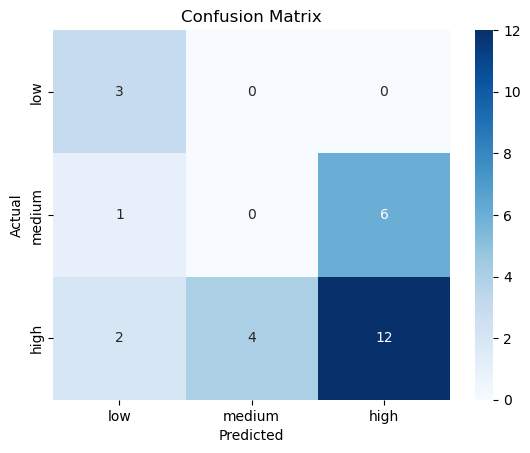

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

clf = RandomForestClassifier(class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["low", "medium", "high"])
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["low","medium","high"], yticklabels=["low","medium","high"], cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


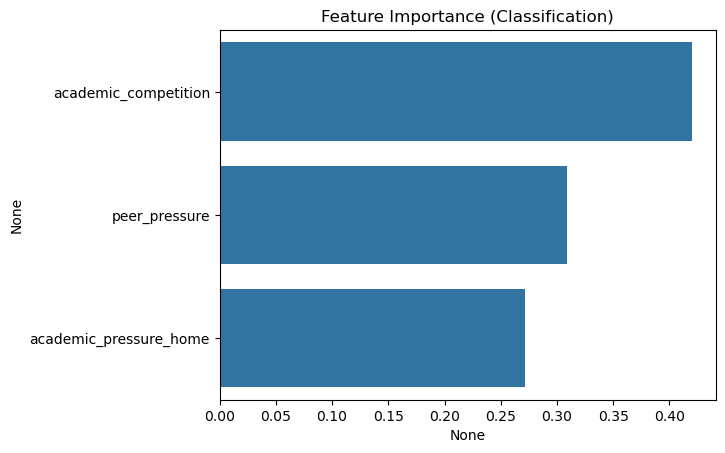

academic_competition      0.420143
peer_pressure             0.308533
academic_pressure_home    0.271324
dtype: float64


In [19]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance (Classification)")
plt.show()
print(feat_imp)


📝 Catatan Analisis Hasil Random Forest
🎯 1. Alasan Pakai Klasifikasi
Data target berupa angka diskrit (1, 2, 3, 4, 5) → artinya setiap angka mewakili kategori tertentu, bukan nilai kontinu.
Contoh:
1 dan 2 = Rendah
3 = Sedang
4 dan 5 = Tinggi
Karena ini kategori, maka pendekatan yang tepat adalah klasifikasi, bukan regresi.
Kalau pakai regresi → hasilnya bisa 2.7 atau 3.8 (nggak nyambung, karena di form tidak ada angka desimal).
Dengan klasifikasi → hasilnya lebih sesuai kondisi nyata: model hanya menebak di kelas yang tersedia (1–5).

🎯 2. Hasil Prediksi (Confusion Matrix)
Low Stress
✅ Semua data low berhasil ditangkap (3/3).
⚠️ Tapi kadang model salah nebak low untuk data lain.
Medium Stress
❌ Model gagal total di sini. Semua data medium malah ditebak jadi high atau low.
👉 Bisa jadi karena jumlah data medium lebih sedikit, jadi model “ngilangin” kelas ini.
High Stress
✅ Mayoritas benar (12 dari 18).
⚠️ Sisanya ada yang salah ke low dan medium.

📊 3. Angka Penting (Classification Report)
Accuracy total: 53% → lebih baik dari tebak asal (33%), tapi masih jauh dari bagus.
Low Stress → recall 100%, artinya semua data low berhasil ditangkap.
Medium Stress → precision & recall = 0, model bener-bener ga bisa bedain kelas ini.
High Stress → precision & recall seimbang di 67%.

🧠 4. Faktor yang Paling Berpengaruh (Feature Importance)
Academic Competition → 42% (paling dominan).
Peer Pressure → 31%.
Academic Pressure from Home → 27%.
👉 Jadi, kompetisi akademik adalah faktor terbesar yang mempengaruhi level stress.

📌 5. Kesimpulan Singkat
Model cukup oke buat bedain low dan high stress.
Kelemahan utama: kelas medium hilang dari radar model.
Faktor utama stress: academic competition.

📝 Random Forest Analysis Notes
🎯 1. Why Classification?
The target data is discrete numbers (1, 2, 3, 4, 5) → each number means a category, not a continuous value.
Example:
1–2 = Low
3 = Medium
4–5 = High
If we use regression → the model could predict weird stuff like 2.7 or 3.8, which doesn’t exist in the form.
With classification → the model only predicts the actual categories (1–5), which makes way more sense.

🎯 2. Prediction Results (Confusion Matrix)
Low Stress
✅ All low samples were correctly caught (3/3).
⚠️ But sometimes the model mislabeled other classes as low.
Medium Stress
❌ Total fail here. The model couldn’t recognize medium at all.
👉 Most likely because there aren’t enough medium samples, so the model just ignores this class.
High Stress
✅ Majority correct (12 out of 18).
⚠️ A few got mixed up with low or medium.

📊 3. Key Numbers (Classification Report)
Overall accuracy: 53% → better than random guessing (33%), but still not great.
Low Stress → recall 100%, meaning every low sample was detected.
Medium Stress → precision & recall = 0, model couldn’t handle this class at all.
High Stress → precision and recall both around 67%.

🧠 4. What Drives Stress the Most? (Feature Importance)
Academic Competition → 42% (the biggest factor).
Peer Pressure → 31%.
Academic Pressure from Home → 27%.
👉 Basically, competition in academics has the strongest impact on student stress.

📌 5. Quick Takeaways
The model does okay-ish for low vs high stress.
Big weakness: medium stress class got completely lost.
Main stress driver: academic competition.

Another Visualization

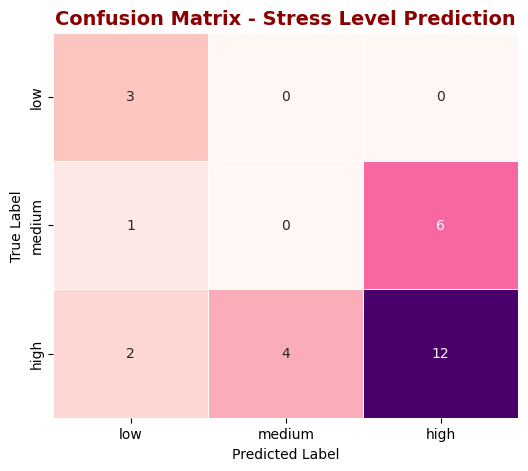

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Urutan label sesuai kategori
labels_order = ["low", "medium", "high"]

# Bikin confusion matrix dengan urutan label yang ditentukan
cm = confusion_matrix(y_test, y_pred, labels=labels_order)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu",  # merah-pink vibes
            xticklabels=labels_order, yticklabels=labels_order,
            cbar=False, linewidths=.5, linecolor="white")

plt.title("Confusion Matrix - Stress Level Prediction", fontsize=14, weight="bold", color="darkred")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


/var/folders/7w/mwkwng71677cfn4xp937b0bc0000gn/T/ipykernel_9787/453422226.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


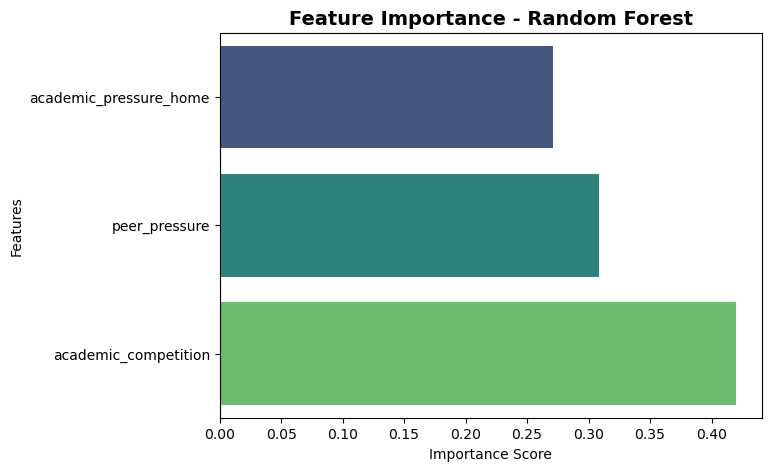

In [21]:
import numpy as np

features = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(7,5))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")

plt.title("Feature Importance - Random Forest", fontsize=14, weight="bold")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
